In [1]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.impute import SimpleImputer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('./ks-projects-201801.csv', encoding='utf-8')
display(df.head())
display(df.shape)
# check null values
display(df.isnull().sum())
display(df.describe())
display(df.dtypes)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


(378661, 15)

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


ID                    int64
name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [3]:
# remove usd pledged and usd_pledged_real column
df = df.drop(['ID', 'name', 'usd pledged', 'usd_pledged_real'], axis=1)

In [4]:
df['deadline'] = pd.to_datetime(df['deadline'], format='%Y-%m-%d %H:%M:%S')
df['launched'] = pd.to_datetime(df['launched'], format='%Y-%m-%d %H:%M:%S')
df['period'] = df['deadline'] - df['launched']
df[['deadline', 'launched', 'period']] = df[['deadline', 'launched', 'period']].astype(np.int64)

In [5]:
df.head()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_goal_real,period
0,Poetry,Publishing,GBP,1444348800000000000,1000.0,1439295148000000000,0.0,failed,0,GB,1533.95,5053652000000000
1,Narrative Film,Film & Video,USD,1509494400000000000,30000.0,1504327437000000000,2421.0,failed,15,US,30000.00,5166963000000000
2,Narrative Film,Film & Video,USD,1361836800000000000,45000.0,1357950050000000000,220.0,failed,3,US,45000.00,3886750000000000
3,Music,Music,USD,1334534400000000000,5000.0,1331954651000000000,1.0,failed,1,US,5000.00,2579749000000000
4,Film & Video,Film & Video,USD,1440806400000000000,19500.0,1435998903000000000,1283.0,canceled,14,US,19500.00,4807497000000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94c9368ef0>,
      dtype=object)

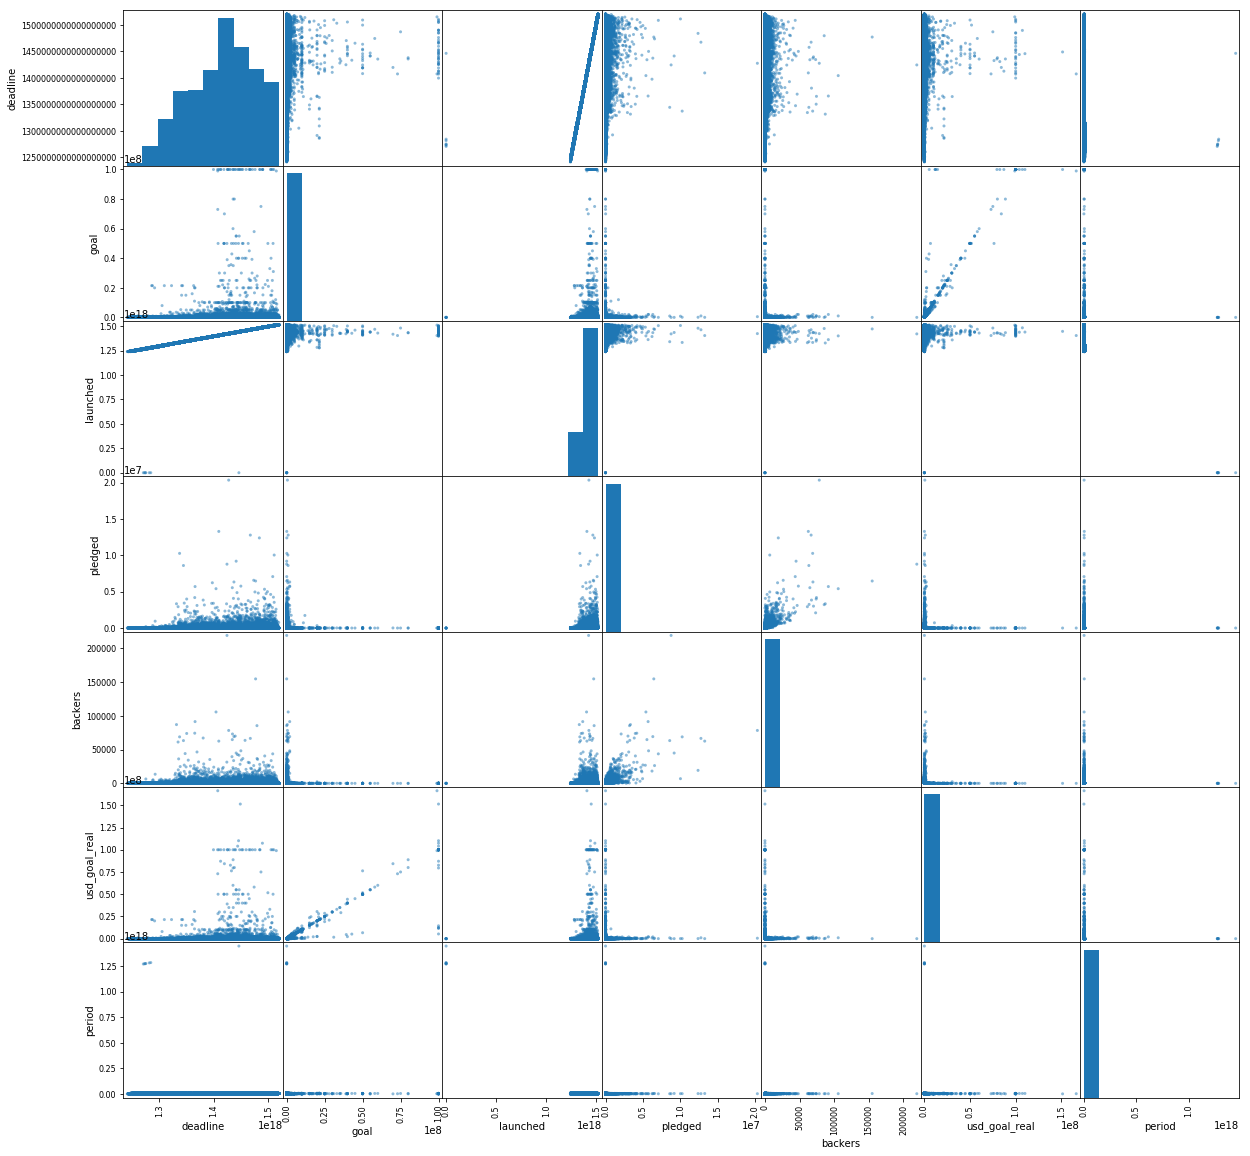

In [6]:
### run slow!!! ###
pd.plotting.scatter_matrix(df, figsize=(20, 20))

In [7]:
df.drop(['usd_goal_real'], axis=1)
df.drop(['deadline'], axis=1)

,category,main_category,currency,goal,launched,pledged,state,backers,country,usd_goal_real,period
0,Poetry,Publishing,GBP,1000.0,1439295148000000000,0.00,failed,0,GB,1533.95,5053652000000000
1,Narrative Film,Film & Video,USD,30000.0,1504327437000000000,2421.00,failed,15,US,30000.00,5166963000000000
2,Narrative Film,Film & Video,USD,45000.0,1357950050000000000,220.00,failed,3,US,45000.00,3886750000000000
3,Music,Music,USD,5000.0,1331954651000000000,1.00,failed,1,US,5000.00,2579749000000000
4,Film & Video,Film & Video,USD,19500.0,1435998903000000000,1283.00,canceled,14,US,19500.00,4807497000000000
5,Restaurants,Food,USD,50000.0,1456493907000000000,52375.00,successful,224,US,50000.00,2974893000000000
6,Food,Food,USD,1000.0,1417458644000000000,1205.00,successful,16,US,1000.00,1661356000000000
7,Drinks,Food,USD,25000.0,1454357112000000000,453.00,failed,40,US,25000.00,3815688000000000
8,Product Design,Design,USD,125000.0,1398363283000000000,8233.00,canceled,58,US,125000.00,2958317000000000
9,Documentary,Film & Video,USD,65000.0,1405115748000000000,6240.57,canceled,43,US,65000.00,2513052000000000


In [8]:
df.groupby('category').count()

,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_goal_real,period
category,,,,,,,,,,,
3D Printing,683,683,683,683,683,683,683,683,683,683,683
Academic,916,916,916,916,916,916,916,916,916,916,916
Accessories,3165,3165,3165,3165,3165,3165,3165,3165,3165,3165,3165
Action,740,740,740,740,740,740,740,740,740,740,740
Animals,255,255,255,255,255,255,255,255,255,255,255
Animation,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541,2541
Anthologies,784,784,784,784,784,784,784,784,784,784,784
Apparel,7166,7166,7166,7166,7166,7166,7166,7166,7166,7166,7166
Apps,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345,6345


In [9]:
df.groupby('main_category').count()

,category,currency,deadline,goal,launched,pledged,state,backers,country,usd_goal_real,period
main_category,,,,,,,,,,,
Art,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153,28153
Comics,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819
Crafts,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809
Dance,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768,3768
Design,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070,30070
Fashion,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816,22816
Film & Video,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585,63585
Food,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602,24602
Games,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231,35231


In [10]:
df.groupby('currency').count()

,category,main_category,deadline,goal,launched,pledged,state,backers,country,usd_goal_real,period
currency,,,,,,,,,,,
AUD,7950,7950,7950,7950,7950,7950,7950,7950,7950,7950,7950
CAD,14962,14962,14962,14962,14962,14962,14962,14962,14962,14962,14962
CHF,768,768,768,768,768,768,768,768,768,768,768
DKK,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129,1129
EUR,17405,17405,17405,17405,17405,17405,17405,17405,17405,17405,17405
GBP,34132,34132,34132,34132,34132,34132,34132,34132,34132,34132,34132
HKD,618,618,618,618,618,618,618,618,618,618,618
JPY,40,40,40,40,40,40,40,40,40,40,40
MXN,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752,1752


In [11]:
df.groupby('state').count()

,category,main_category,currency,deadline,goal,launched,pledged,backers,country,usd_goal_real,period
state,,,,,,,,,,,
canceled,38779,38779,38779,38779,38779,38779,38779,38779,38779,38779,38779
failed,197719,197719,197719,197719,197719,197719,197719,197719,197719,197719,197719
live,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799,2799
successful,133956,133956,133956,133956,133956,133956,133956,133956,133956,133956,133956
suspended,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846,1846
undefined,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562,3562


In [12]:
df.groupby('country').count()

,category,main_category,currency,deadline,goal,launched,pledged,state,backers,usd_goal_real,period
country,,,,,,,,,,,
AT,597,597,597,597,597,597,597,597,597,597,597
AU,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839,7839
BE,617,617,617,617,617,617,617,617,617,617,617
CA,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756,14756
CH,761,761,761,761,761,761,761,761,761,761,761
DE,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171,4171
DK,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113,1113
ES,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276,2276
FR,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939,2939


In [13]:
X = df.drop(['state'], axis=1)

In [14]:
# convert categories to numbers
X = pd.get_dummies(X, columns=['category', 'main_category', 'currency', 'country'])
y = df['state'] == 'successful'

In [15]:
display(X.head())
display(df.shape)

,deadline,goal,launched,pledged,backers,usd_goal_real,period,category_3D Printing,category_Academic,category_Accessories,...,country_JP,country_LU,country_MX,"country_N,0""",country_NL,country_NO,country_NZ,country_SE,country_SG,country_US
0,1444348800000000000,1000.0,1439295148000000000,0.0,0,1533.95,5053652000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1509494400000000000,30000.0,1504327437000000000,2421.0,15,30000.00,5166963000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1361836800000000000,45000.0,1357950050000000000,220.0,3,45000.00,3886750000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1334534400000000000,5000.0,1331954651000000000,1.0,1,5000.00,2579749000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1440806400000000000,19500.0,1435998903000000000,1283.0,14,19500.00,4807497000000000,0,0,0,...,0,0,0,0,0,0,0,0,0,1


(378661, 12)

In [16]:
display(y.head())
display(y.shape)

0    False
1    False
2    False
3    False
4    False
Name: state, dtype: bool

(378661,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [18]:
pipelines = {
    'logictic': Pipeline([('scl', StandardScaler()),
                          ('est', SGDClassifier(loss='log', penalty='none', max_iter=100000, tol=1e-4))])
#     'svm': Pipeline([('scl', StandardScaler()),
#                      ('est', SVC(C=1, kernel='rbf'))])
}
print(X_train.shape)
print(y_train.shape)

(340794, 218)
(340794,)


In [19]:
%%time
scores = {}
for pipe_name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    scores[(pipe_name, 'f1_score', 'train')] = f1_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name, 'precision_score', 'train')] = precision_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name, 'recall', 'train')] = recall_score(y_train, pipeline.predict(X_train))
    scores[(pipe_name, 'f1_score', 'test')] = f1_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name, 'precision_score', 'test')] = precision_score(y_test, pipeline.predict(X_test))
    scores[(pipe_name, 'recall', 'test')] = recall_score(y_test, pipeline.predict(X_test))

/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/base.py:467: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by Stan

CPU times: user 5min 8s, sys: 2.73 s, total: 5min 11s
Wall time: 5min 9s


/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/Users/keisukeogiwara/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [20]:
pd.Series(scores).unstack()

test     train
logictic f1_score         0.897485  0.900794
         precision_score  0.935610  0.938209
         recall           0.862345  0.866248